Let's use Pandas to access the data and then we will proceed with preprocessing

In [1]:
import os
import pandas as pd 

In [2]:
train_data = pd.read_csv("drugsComTrain_raw.csv")        #reading the given csv file
test_data = pd.read_csv("drugsComTest_raw.csv")

In [4]:
train_data.head(10)                                       #visualizing the top 5 rows in the dataset

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
train_data['review'][4]                      #taking a look at the review text we have with us

'"Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."'

In [6]:
ANALYSIS OF THE GIVEN DATA

SyntaxError: invalid syntax (<ipython-input-6-df9ac923b8f6>, line 1)

In [ ]:
print("Shape of the training data is: ", train_data.shape)  #size of training data
print("Shape of the testing data is: ", test_data.shape)    #size of testing data

In [6]:
#number of unique conditions in training and testing data

x = train_data['condition'].nunique()
print("There are total",x,"unique conditions training data")
x = test_data['condition'].nunique()
print("There are total",x,"unique conditions testing data")

There are total 884 unique conditions training data
There are total 708 unique conditions testing data


Text(0.5, 1.0, 'Drugs per condition in given training data')

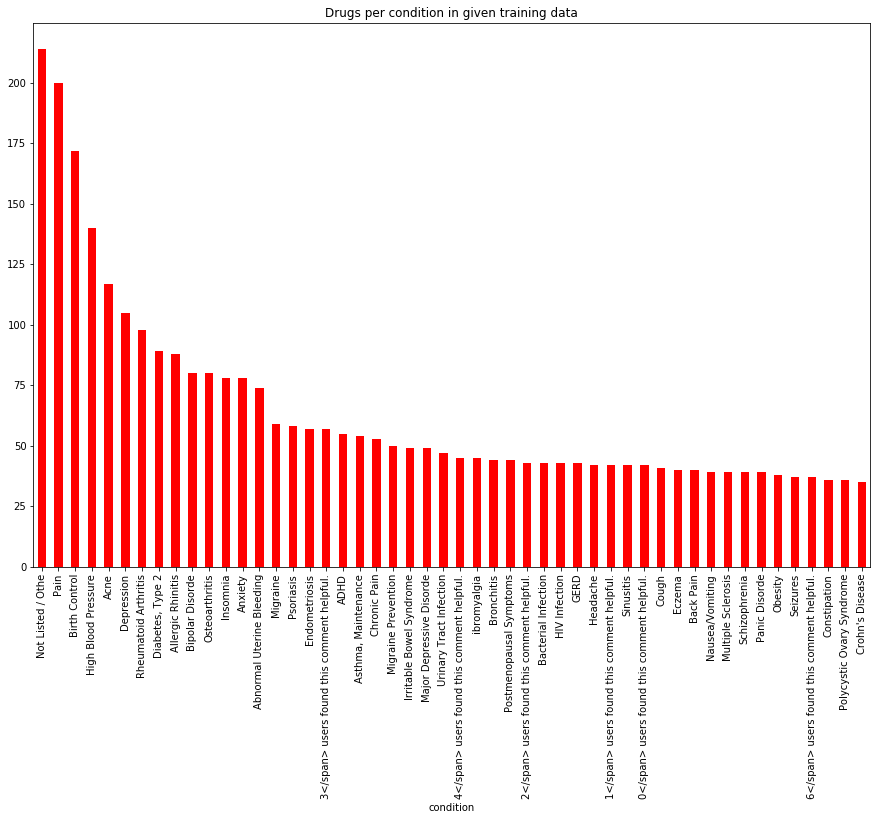

In [9]:
#bar graph representing the drugs that are available for each condition for both training and testing data

import matplotlib.pyplot as plt
condition_drugName_train = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_drugName_train[0:50].plot(kind="bar", figsize = (15,10), color="red")
plt.title("Drugs per condition in given training data")

Text(0.5, 1.0, 'Drugs per condition in given testing data')

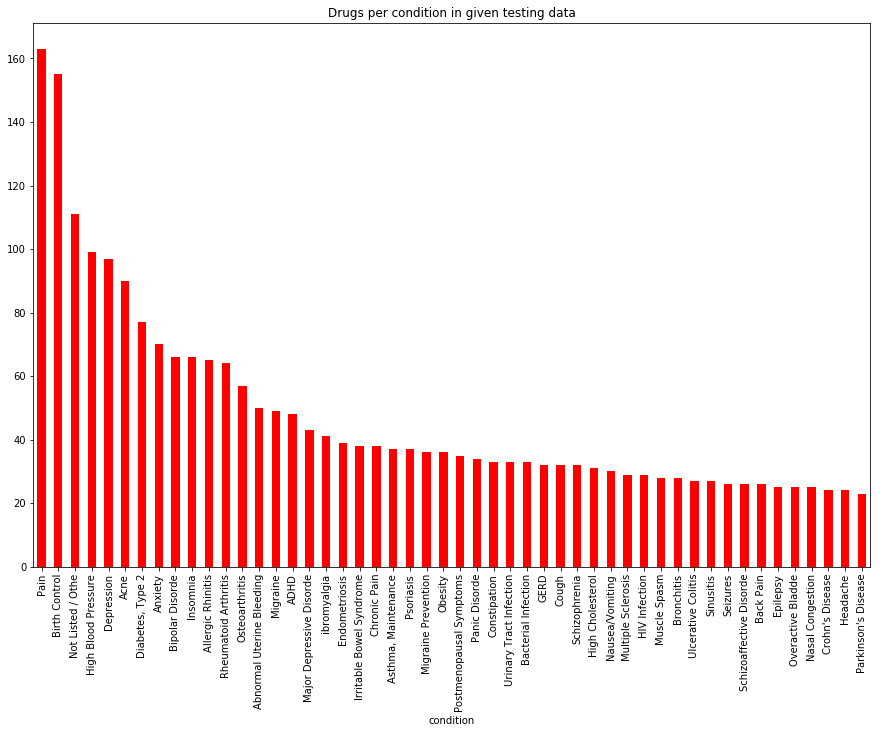

In [8]:
condition_drugName_test = test_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_drugName_test[0:50].plot(kind="bar", figsize = (15,10), color="red")
plt.title("Drugs per condition in given testing data")

As you can see Birth control has approx 160 different drug reviews. Top 50 conditions are represented in the bar graphs.
"3</span> users found this comment helpful" appears in the condition which needs to be removed for more accurate predictions.

We will use 4-gram for our sentiment analysis

In [10]:
def rate(x):
    if x > 5:
        return 1
    else:
        return 0


train_data['sentiment'] = train_data["rating"].apply(lambda x: rate(x))

Let's create a wordcloud to look at the important words

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


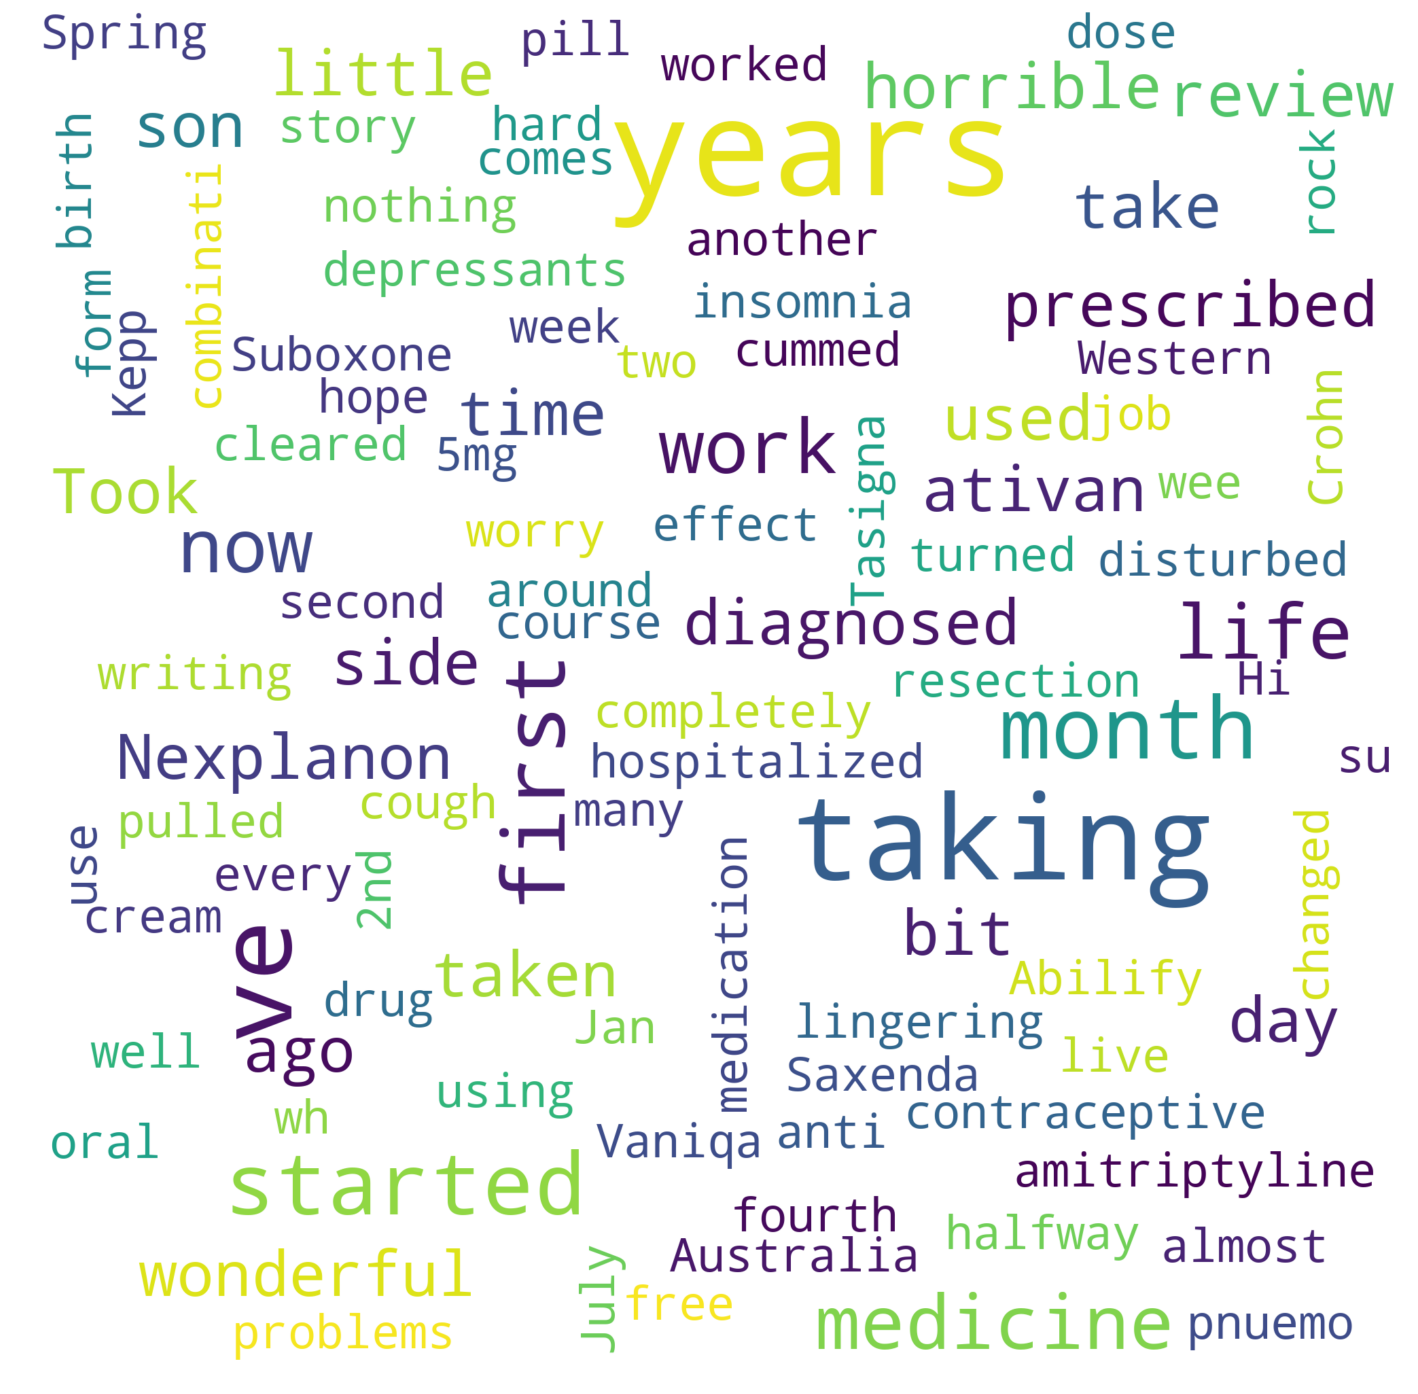

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stopwords = stopwords.union(more_stopwords)
data = pd.concat([train_data, test_data])
wordcloud = WordCloud(max_font_size = 200, stopwords = stopwords, width = 2000, height = 2000, max_words = 100, background_color = "white").generate(str(data['review']))
plt.figure(figsize = (25.0, 25.0))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
train, test = train_test_split(train_data, test_size = 0.33)

In [14]:
y_train = []
y_test = []
y_train = train['sentiment']
y_test = test['sentiment']

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [16]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stopwords.remove(i)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None, min_df = 2, ngram_range=(4, 4), max_features = 20000)


vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(4, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
pipeline = Pipeline([('vect', vectorizer)])

NameError: name 'Pipeline' is not defined

In [19]:
stemmer = nltk.SnowballStemmer('english')
import re
from bs4 import BeautifulSoup

def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if not w in stopwords]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return( ' '.join(stemming_words))

In [20]:
%time train_data['review_clean'] = train_data['review'].apply(review_to_words)

Wall time: 3min 36s


In [21]:
%time test_data['review_clean'] = test_data['review'].apply(review_to_words)

Wall time: 1min 18s


In [22]:
train_data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,1,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,suboxon complet turn life around feel healthie...


In [23]:
%time train_data_features = pipeline.fit_transform(train_data['review_clean'])
%time test_data_features = pipeline.fit_transform(test_data['review_clean'])

Wall time: 38.5 s
Wall time: 14 s


In [24]:
train_data_features.shape

(161297, 20000)

In [29]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

C:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

Using TensorFlow backend.


In [35]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. Dataset
y_train = train_data['sentiment']
#y_test = test_data['sentiment']
solution = y_test.copy()

# 2. Model Structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape=(20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               4000200   
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               60300     
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 300)               0         
__________

In [37]:
training_res = model.fit(train_data_features, y_train, epochs=10, batch_size=64)

Epoch 1/10
161297/161297 [==============================] - 297s 2ms/step - loss: 0.5775 - acc: 0.7163
Epoch 2/10
161297/161297 [==============================] - 296s 2ms/step - loss: 0.4986 - acc: 0.7586
Epoch 3/10
161297/161297 [==============================] - 295s 2ms/step - loss: 0.4648 - acc: 0.7746
Epoch 4/10
161297/161297 [==============================] - 296s 2ms/step - loss: 0.4459 - acc: 0.7829
Epoch 5/10
161297/161297 [==============================] - 310s 2ms/step - loss: 0.4323 - acc: 0.7886
Epoch 6/10
161297/161297 [==============================] - 325s 2ms/step - loss: 0.4232 - acc: 0.7923
Epoch 7/10
161297/161297 [==============================] - 332s 2ms/step - loss: 0.4157 - acc: 0.7950
Epoch 8/10
161297/161297 [==============================] - 340s 2ms/step - loss: 0.4105 - acc: 0.7973
Epoch 9/10
161297/161297 [==============================] - 323s 2ms/step - loss: 0.4049 - acc: 0.8003
Epoch 10/10
161297/161297 [==============================] - 327s 2ms/ste

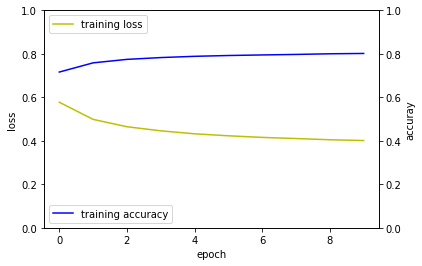

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(training_res.history['loss'], 'y', label='training loss')
acc_ax.plot(training_res.history['acc'], 'b', label='training accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
